## 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

### 2.2 Data preparation

In [2]:
# download data

# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

# !wget $data 

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.describe(include='all')

make           model          year  engine_fuel_type  \
count       11914           11914  11914.000000             11911   
unique         48             915           NaN                10   
top     Chevrolet  Silverado 1500           NaN  regular unleaded   
freq         1123             156           NaN              7172   
mean          NaN             NaN   2010.384338               NaN   
std           NaN             NaN      7.579740               NaN   
min           NaN             NaN   1990.000000               NaN   
25%           NaN             NaN   2007.000000               NaN   
50%           NaN             NaN   2015.000000               NaN   
75%           NaN             NaN   2016.000000               NaN   
max           NaN             NaN   2017.000000               NaN   

          engine_hp  engine_cylinders transmission_type      driven_wheels  \
count   11845.00000      11884.000000             11914              11914   
unique          NaN               NaN                 5                  4   
top             NaN               NaN         AUTOMATIC  front wheel drive   
freq            NaN               NaN              8266               4787   
mean      249.38607          5.628829               NaN                NaN   
std       109.19187          1.780559               NaN                NaN   
min        55.00000          0.000000               NaN                NaN   
25%       170.00000          4.000000               NaN                NaN   
50%       227.00000          6.000000               NaN                NaN   
75%       300.00000          6.000000               NaN                NaN   
max      1001.00000         16.000000               NaN                NaN   

        number_of_doors market_category vehicle_size vehicle_style  \
count      11908.000000            8172        11914         11914   
unique              NaN              71            3            16   
top                 NaN       Crossover      Compact         Sedan   
freq                NaN            1110         4764          3048   
mean           3.436093             NaN          NaN           NaN   
std            0.881315             NaN          NaN           NaN   
min            2.000000             NaN          NaN           NaN   
25%            2.000000             NaN          NaN           NaN   
50%            4.000000             NaN          NaN           NaN   
75%            4.000000             NaN          NaN           NaN   
max            4.000000             NaN          NaN           NaN   

         highway_mpg      city_mpg    popularity          msrp  
count   11914.000000  11914.000000  11914.000000  1.191400e+04  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean       26.637485     19.733255   1554.911197  4.059474e+04  
std         8.863001      8.987798   1441.855347  6.010910e+04  
min        12.000000      7.000000      2.000000  2.000000e+03  
25%        22.000000     16.000000    549.000000  2.100000e+04  
50%        26.000000     18.000000   1385.000000  2.999500e+04  
75%        30.000000     22.000000   2009.000000  4.223125e+04  
max       354.000000    137.000000   5657.000000  2.065902e+06

In [9]:
df['make']

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: make, Length: 11914, dtype: object

In [10]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [13]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')    

In [15]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### 2.3 Exploratory data analysis

In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique())      # không giới hạn 5 phần tử nữa
    print(df[col].nunique())
    print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti'

In [18]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [20]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

Distribution of price

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

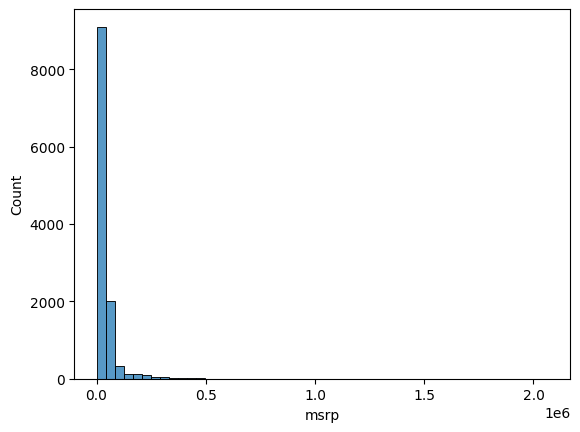

In [25]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

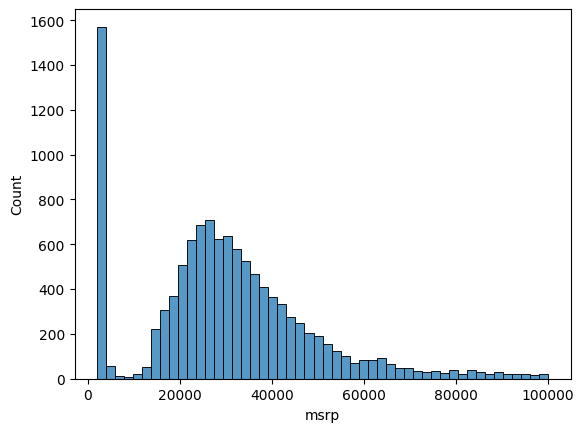

In [28]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
# plt.show()

In [30]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [31]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [33]:
price_logs = np.log1p(df.msrp)

In [34]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

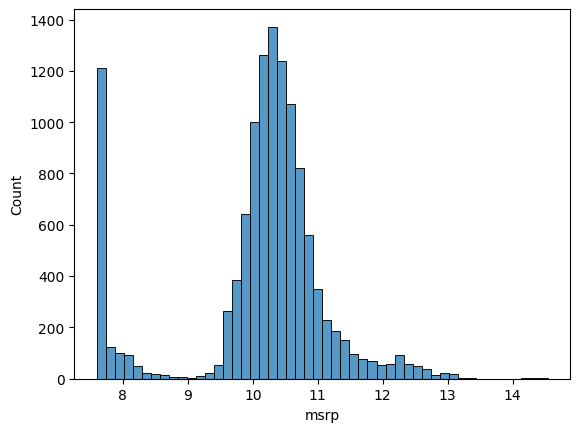

In [35]:
sns.histplot(price_logs, bins=50)
# plt.show()

In [36]:
df.isnull()

make  model   year  engine_fuel_type  engine_hp  engine_cylinders  \
0      False  False  False             False      False             False   
1      False  False  False             False      False             False   
2      False  False  False             False      False             False   
3      False  False  False             False      False             False   
4      False  False  False             False      False             False   
...      ...    ...    ...               ...        ...               ...   
11909  False  False  False             False      False             False   
11910  False  False  False             False      False             False   
11911  False  False  False             False      False             False   
11912  False  False  False             False      False             False   
11913  False  False  False             False      False             False   

       transmission_type  driven_wheels  number_of_doors  market_category  \
0                  False          False            False            False   
1                  False          False            False            False   
2                  False          False            False            False   
3                  False          False            False            False   
4                  False          False            False            False   
...                  ...            ...              ...              ...   
11909              False          False            False            False   
11910              False          False            False            False   
11911              False          False            False            False   
11912              False          False            False            False   
11913              False          False            False            False   

       vehicle_size  vehicle_style  highway_mpg  city_mpg  popularity   msrp  
0             False          False        False     False       False  False  
1             False          False        False     False       False  False  
2             False          False        False     False       False  False  
3             False          False        False     False       False  False  
4             False          False        False     False       False  False  
...             ...            ...          ...       ...         ...    ...  
11909         False          False        False     False       False  False  
11910         False          False        False     False       False  False  
11911         False          False        False     False       False  False  
11912         False          False        False     False       False  False  
11913         False          False        False     False       False  False  

[11914 rows x 16 columns]

In [37]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

Let's draw it

In [39]:
int(len(df)*0.2)

2382

In [40]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test


In [41]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [42]:
n, n_val + n_test + n_train

(11914, 11914)

In [43]:
df.iloc[[10, 0, 3, 5]]

make       model  year             engine_fuel_type  engine_hp  \
10  bmw    1_series  2013  premium_unleaded_(required)      300.0   
0   bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
3   bmw    1_series  2011  premium_unleaded_(required)      230.0   
5   bmw    1_series  2012  premium_unleaded_(required)      230.0   

    engine_cylinders transmission_type     driven_wheels  number_of_doors  \
10               6.0            manual  rear_wheel_drive              2.0   
0                6.0            manual  rear_wheel_drive              2.0   
3                6.0            manual  rear_wheel_drive              2.0   
5                6.0            manual  rear_wheel_drive              2.0   

                          market_category vehicle_size vehicle_style  \
10                luxury,high-performance      compact         coupe   
0   factory_tuner,luxury,high-performance      compact         coupe   
3                      luxury,performance      compact         coupe   
5                      luxury,performance      compact         coupe   

    highway_mpg  city_mpg  popularity   msrp  
10           28        20        3916  39600  
0            26        19        3916  46135  
3            28        18        3916  29450  
5            28        18        3916  31200

In [63]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val:n_val+n_test:]

In [64]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [65]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [66]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [67]:
df_train

make        model  year                engine_fuel_type  \
2735     chevrolet       cobalt  2008                regular_unleaded   
6720        toyota       matrix  2012                regular_unleaded   
5878        subaru      impreza  2016                regular_unleaded   
11190   volkswagen      vanagon  1991                regular_unleaded   
4554          ford        f-150  2017        flex-fuel_(unleaded/e85)   
...            ...          ...   ...                             ...   
434            bmw     4_series  2015     premium_unleaded_(required)   
1902    volkswagen       beetle  2015  premium_unleaded_(recommended)   
9334           gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
5284   rolls-royce        ghost  2014     premium_unleaded_(required)   
2420    volkswagen           cc  2017  premium_unleaded_(recommended)   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
2735       148.0               4.0            manual  front_wheel_drive   
6720       132.0               4.0         automatic  front_wheel_drive   
5878       148.0               4.0         automatic    all_wheel_drive   
11190       90.0               4.0            manual   rear_wheel_drive   
4554       385.0               8.0         automatic   four_wheel_drive   
...          ...               ...               ...                ...   
434        300.0               6.0         automatic   rear_wheel_drive   
1902       210.0               4.0  automated_manual  front_wheel_drive   
9334       285.0               6.0         automatic   four_wheel_drive   
5284       563.0              12.0         automatic   rear_wheel_drive   
2420       200.0               4.0  automated_manual  front_wheel_drive   

       number_of_doors            market_category vehicle_size  \
2735               2.0                        NaN      compact   
6720               4.0                  hatchback      compact   
5878               4.0                  hatchback      compact   
11190              3.0                        NaN        large   
4554               4.0                  flex_fuel        large   
...                ...                        ...          ...   
434                2.0         luxury,performance      midsize   
1902               2.0      hatchback,performance      compact   
9334               4.0                  flex_fuel        large   
5284               4.0  exotic,luxury,performance        large   
2420               4.0                performance      midsize   

             vehicle_style  highway_mpg  city_mpg  popularity    msrp  
2735                 coupe           33        24        1385   14410  
6720         4dr_hatchback           32        25        2031   19685  
5878         4dr_hatchback           37        28         640   19795  
11190    passenger_minivan           18        16         873    2000  
4554       crew_cab_pickup           21        15        5657   56260  
...                    ...          ...       ...         ...     ...  
434            convertible           31        20        3916   54900  
1902         2dr_hatchback           30        24         873   29215  
9334   extended_cab_pickup           22        17         549   34675  
5284                 sedan           21        13          86  303300  
2420                 sedan           31        22         873   37820  

[7150 rows x 16 columns]

In [68]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [69]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [70]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [71]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [72]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [73]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

### 2.5 Linear regression

draw

In [74]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [75]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [76]:
len(xi)

3

In [77]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [78]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [79]:
linear_regression(xi)

12.312

In [80]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [81]:
np.log1p(222347.2221101062)

np.float64(12.312)

### 2.6 Linear regression vector form

In [82]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [83]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [84]:
w_new = [w0] + w

In [85]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [86]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [87]:
linear_regression(xi)

12.312

In [88]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [89]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [90]:
def linear_regression(X):
    return X.dot(w_new)

In [91]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### 2.7 Training a linear regression model

In [92]:
def train_linear_regression(X, y):
    pass

In [93]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [94]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [95]:
X = np.column_stack([ones, X])

In [96]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [97]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [98]:
w0 = w_full[0]
w = w_full[1:]

In [99]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [100]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # XTX_inv = np.linalg.inv(XTX)
    XTX_inv = np.linalg.pinv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [101]:
train_linear_regression(X, y)

(np.float64(12922.377029953557),
 array([ 1.29223770e+04, -1.60890647e+01, -1.99472549e+02, -1.22802884e+00]))

### 2.8 Car price baseline model

In [102]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [103]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [104]:
w0

np.float64(7.927257388275324)

In [105]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

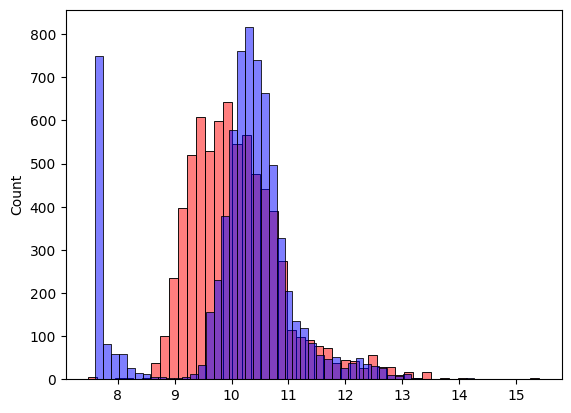

In [106]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

### 2.9 RMSE

In [107]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [108]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### 2.10 Validating the model

In [109]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [110]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7616530991309105)

### 2.11 Simple feature engineering

In [111]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [112]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461064317)

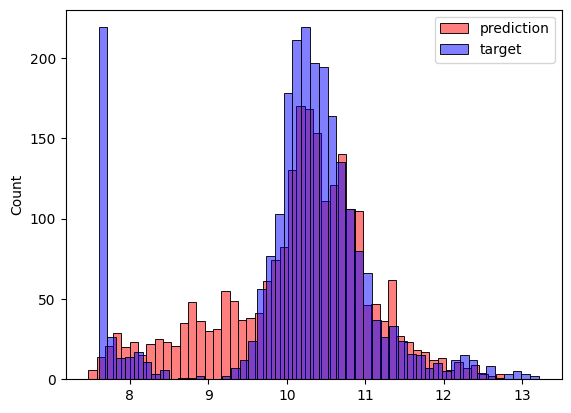

In [113]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()
plt.show()

### 2.12 Categorical variables

In [114]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [115]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [116]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.46081530986410296)

In [117]:
w0, w

(np.float64(7.132312795998921),
 array([ 2.02435719e-03,  1.18140368e-01, -4.99330035e-03,  6.70625293e-03,
        -5.42025427e-05, -9.66857737e-02, -1.26211051e+00, -1.30599228e+00,
        -9.77597404e-01, -6.09763870e-02,  1.80662873e-01,  4.54454035e-02,
         1.20922714e-02, -1.50026334e-01, -2.79760310e-01, -6.55575814e-01,
        -3.30146222e-01, -3.72555750e-01, -3.69302143e-01, -6.42413000e-01,
        -1.17935919e-01, -5.16529298e-01, -6.81332057e-01, -3.23686297e-01,
         1.78220542e+00,  1.75394436e+00,  1.81033015e+00,  1.78583287e+00,
        -4.60534799e-02,  1.31546474e-01, -1.73468294e-02,  2.81080695e-02,
        -2.25087297e-02,  2.41755001e+00,  2.34714384e+00,  2.36761895e+00,
        -1.44115659e-01, -2.62579825e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

### 2.13 Regularization

In [118]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [120]:
y= [1, 2, 3, 1, 2, 3]
y

[1, 2, 3, 1, 2, 3]

In [121]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [124]:
# XTX_inv = np.linalg.inv(XTX) : Ma trận không khả nghịch
XTX_inv = np.linalg.pinv(XTX)




In [125]:
XTX_inv

array([[ 0.03858521, -0.01982851, -0.01982851],
       [-0.01982851,  0.01250447,  0.01250447],
       [-0.01982851,  0.01250447,  0.01250447]])

In [126]:
XTX_inv.dot(X.T).dot(y)

array([0.33654877, 0.04001429, 0.04001429])

In [127]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [128]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [129]:
XTX = XTX + 0.01 * np.eye(3)

In [130]:
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.0000001],
       [2.       , 1.0000001, 1.01     ]])

In [131]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [132]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [133]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4608208286551885)

### 2.14 Tuning the model

In [134]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 120883643437600.25 53.70370772576197
1e-05 8.377536683531915 0.46081532306190714
0.0001 7.139523156766516 0.4608153655817384
0.001 7.1309028247366735 0.46081585855400226
0.1 7.000232409563555 0.4608736549095069
1 6.25074784766319 0.46158128382736374
10 4.729512585705947 0.4726098772668833


In [135]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.46081585855400226)

### 2.15 Using the model

In [138]:
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [139]:
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [140]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4600753970082232)

In [141]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [142]:
df_small = pd.DataFrame([car])
df_small

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  toyota  sienna  2015  regular_unleaded      266.0               6.0   

  transmission_type      driven_wheels  number_of_doors  market_category  \
0         automatic  front_wheel_drive              4.0              NaN   

  vehicle_size      vehicle_style  highway_mpg  city_mpg  popularity  
0        large  passenger_minivan           25        18        2031

In [143]:
X_small = prepare_X(df_small)

In [144]:
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [145]:
y_pred = w0 + X_small.dot(w)

y_pred = y_pred[0]

y_pred

np.float64(10.63249251496894)

In [146]:
np.expm1(y_pred)

np.float64(41459.337028846196)

In [147]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

### 2.16 Next steps


We included only 5 top features. What happens if we include 10?
Other projects

Predict the price of a house - e.g. boston dataset

https://archive.ics.uci.edu/ml/datasets.php?task=reg

https://archive.ics.uci.edu/ml/datasets/Student+Performance

### 2.17 Summary

EDA - looking at data, finding missing values
Target variable distribution - long tail => bell shaped curve
Validation framework: train/val/test split (helped us detect problems)
Normal equation - not magic, but math
Implemented it with numpy
RMSE to validate our model
Feature engineering: age, categorical features
Regularization to fight numerical instability